# CSE -221710302064- Vishnu Pulipaka

#### Take any dataset of your own and explore all the data preprocessing steps whichever is 

In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Check the data types and get the summary stats


In [5]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# If you have any missing values in the numerical columns try imputing those columns     
- Create a dataframe by imputing  the missing values with mean 
- Create a dataframe by imputing the missing values with median


In [13]:
df.isnull().sum().sort_values()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Conclusion : No missing Values found in the dataset

# If any missing values in categorical columns, impute it with mode

In [15]:
# adding a categorical column :
df['chance_rating']=pd.cut(df.iloc[:,-1],bins=[0,0.4,0.8,1.1],labels=['low','medium','good'])

In [16]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_rating
0,1,337,118,4,4.5,4.5,9.65,1,0.92,good
1,2,324,107,4,4.0,4.5,8.87,1,0.76,medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,medium


# For the categorical columns apply  different kinds of encoding techniques


In [21]:
## Label Encoder

from sklearn.preprocessing import LabelEncoder
# creating object
le=LabelEncoder()
sample=df.copy()

In [22]:
# fitting the encoder
sample.Research=le.fit_transform(sample.Research)

In [23]:
sample

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_rating
0,1,337,118,4,4.5,4.5,9.65,1,0.92,good
1,2,324,107,4,4.0,4.5,8.87,1,0.76,medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,medium
3,4,322,110,3,3.5,2.5,8.67,1,0.80,medium
4,5,314,103,2,2.0,3.0,8.21,0,0.65,medium
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,good
496,497,337,117,5,5.0,5.0,9.87,1,0.96,good
497,498,330,120,5,4.5,5.0,9.56,1,0.93,good
498,499,312,103,4,4.0,5.0,8.43,0,0.73,medium


### conclusion: research colummn is already encoded using label encoder as the output is same 

In [29]:
# encoding chance_rating column using pandas get_dummies:
s2=df.copy()
s2=pd.concat([s2,pd.get_dummies(s2.chance_rating,drop_first=True)],axis=1)

In [30]:
s2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_rating,medium,good
0,1,337,118,4,4.5,4.5,9.65,1,0.92,good,0,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,medium,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,medium,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,medium,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,medium,1,0


In [31]:
# encoding chance_Rating using OneHotEncoder:
s3=df.copy()

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[9])],
                                     remainder='passthrough')

In [34]:
s3 = column_transformer.fit_transform(s3)
s3=pd.DataFrame(s3)

In [35]:
s3.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,0.0,0.0,1.0,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,0.0,0.0,1.0,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,0.0,0.0,1.0,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,0.0,0.0,1.0,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


#### 0,1,2 are encoded columns , one of the three columns is dropped to avoid dummy variable trap

# If there any duplicate values, drop the duplicate values(Do not drop from the original dataframe)

In [36]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_rating


#### no duplicates formed

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the columns with different kinds of plots and write the patterns you have observed.

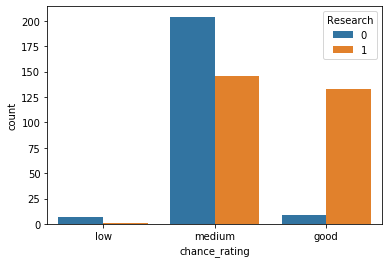

In [47]:
sns.countplot(df.chance_rating,hue=df.Research)

#### Observations:
- most students have medium chance
- there are less than 10 students with low chance

(array([  0.,   0.,   0.,  84., 416.]),
 array([ 0,  2,  4,  6,  8, 10]),
 <a list of 5 Patch objects>)

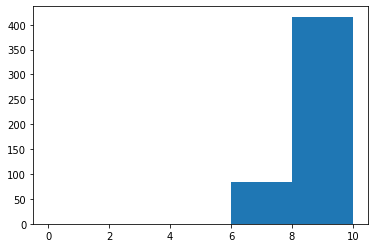

In [45]:
plt.hist(df.CGPA,bins=[0,2,4,6,8,10])

 ### observations:
    - above histogram shows that most students have a cgpa of over 6

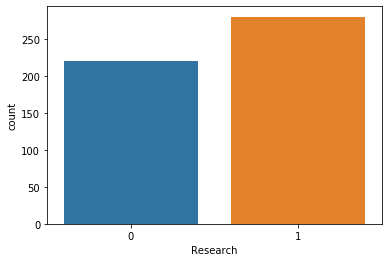

In [46]:
sns.countplot(df.Research)

### observations:
- only a little mpre than half students completed their research
    

# Using boxplot, visualize the outliers if present in the dataset

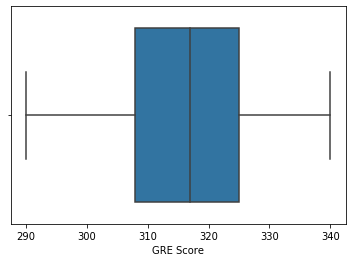

In [58]:
sns.boxplot('GRE Score',data=df)

In [61]:
df['GRE Score'].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

In [65]:
#from above figure and data,
Q1=308
Q2=317
Q3=325

# inter quartile range:
IQR=Q3-Q1

## outliers are values
# >=Q3+1.5*IQR
# <=Q1-1.5*IQR

k1=Q3+1.5*IQR
k2=Q1-1.5*IQR

outliers=df[(df["GRE Score"]<=k2)|(df["GRE Score"]>=k1)]

In [66]:
outliers

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_rating


### conclusion : there are no outliers in the above dataset

# Identify the Output column in the dataset and divide the entire dataset into Input and Output; create the training and testing datasets.

In [69]:
# input and output
X = df.iloc[:,:]
X = df.drop(['chance_rating'],axis = 1)
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,medium,good
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1,0


In [70]:
y=df[["chance_rating"]]
y.head()

,chance_rating
0,good
1,medium
2,medium
3,medium
4,medium


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

print(X_train.shape)   # input
print(X_test.shape)    # output
print(y_train.shape)   # input
print(y_test.shape)    # output

(375, 11)
(125, 11)
(375, 1)
(125, 1)


In [72]:
## Data scaling not necessary for label predicting